# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
import warnings

warnings.filterwarnings("ignore") #This is to ignore warnings that may pop up in the codes

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Load Dataset

In [ ]:
#Connecting Google drive with Google colab
# Reading the data-set into Google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the "EasyVisa.csv" dataset into a dataframe (i.e.loading the data)
path="/content/drive/My Drive/EasyVisa.csv"
easyvisa = pd.read_csv(path)

In [ ]:
# creating a copy of the dataset by copying data to another variable to avoid any changes to original dataset
data = easyvisa.copy()



## Data Overview

- Observations
- Sanity checks
-These can be achieved by doing the following;

1.   Viewing the first and last few rows of the dataset
2.   Checking the shape of the dataset
3. Ensuring that the data is stored in the correct format, it's important to identify the data types.
4. Getting the statistical summary for the variables.
5. Checking for missing values.
6. Checking for duplicates


### View the first and last 5 few rows of the dataset

In [ ]:
# returning the first 5 rows using the dataframe head method
data.head()

case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0         592.2029         Hour                  Y      Denied  
1       83425.6500         Year                  Y   Certified  
2      122996.8600         Year                  Y      Denied  
3       83434.0300         Year                  Y      Denied  
4      149907.3900         Year                  Y   Certified

In [ ]:
# returning the last 5 rows using dataframe tail method
data.tail()

case_id continent education_of_employee has_job_experience  \
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
25475                     Y             2601         2008   
25476                     N             3274         2006   
25477                     N             1121         1910   
25478                     Y             1918         1887   
25479                     N             3195         1960   

      region_of_employment  prevailing_wage unit_of_wage full_time_position  \
25475                South         77092.57         Year                  Y   
25476            Northeast        279174.79         Year                  Y   
25477                South        146298.85         Year                  N   
25478                 West         86154.77         Year                  Y   
25479              Midwest         70876.91         Year                  Y   

      case_status  
25475   Certified  
25476   Certified  
25477   Certified  
25478   Certified  
25479   Certified

#### Checking the shape of the dataset

In [ ]:
#checking shape of the dataframe to find out the number of rows and columns using the dataframe shape command
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 25480 rows and 12 columns.


### Checking the columns data types for the dataset

In [ ]:
# Using the dataframe info() method to print a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Observation**


*   The dataset contains 12 series (columns) of which one of the series is of the float datatype (prevailing_wage),two(2) of the series are of the integer datatype (no_of_employees,, no_of_weekend and yr_of_estab) and nine(9) of the series are of the object datatype (case_id,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position and case_status).

* Total memory usage is approximately 2.3+ MB.

### Getting the statistical summary for the variables.

In [ ]:
# checking the statistical summary of the data using describe command and transposing.
data.describe().T

count          mean           std        min       25%  \
no_of_employees  25480.0   5667.043210  22877.928848   -26.0000   1022.00   
yr_of_estab      25480.0   1979.409929     42.366929  1800.0000   1976.00   
prevailing_wage  25480.0  74455.814592  52815.942327     2.1367  34015.48   

                      50%          75%        max  
no_of_employees   2109.00    3504.0000  602069.00  
yr_of_estab       1997.00    2005.0000    2016.00  
prevailing_wage  70308.21  107735.5125  319210.27

**Observation**

* There are 25480  observations present in all

* Differences between mean and median values indicate skewness in the data

*  The average number of employees working for  employers who are seeking to bring foreign workers into the United States is 5667 employees. 1022 of the employees makes up 25% of the employees.

*  25% of the employers had their companies established before 1976, and 75% of the employers  had their companies established before 2005, none of them was established after 2016.



### Checking for missing values

In [ ]:
# Checking for missing values
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

**Observation**
No null values present, therefore no missing values listed

###Checking unique values

In [ ]:
data.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

This gives an idea about the number of unique values in each column, there are 25480 unique values in the case_id series, 6 in the continent series, 4 in the education_of_employee series, 2 in the has_job_experience series, 2 in the requires_job_training series, 7105 unique values in the no_of_employees series, 199 in the yr_of_estab series, 5 in the region_of_employment series, 25454 in the prevailing_wage series, 4 in the unit_of_wage series, 2 in the full_time_position series and 2 in the case_status series.

### Checking for duplicate values

In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

**Observation**
* There are no duplicate values in the dataset

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

#### Checking and Fixing the negative values in number of employees columns

In [ ]:
data.loc[data['no_of_employees']<0].shape

(33, 12)

In [ ]:
# taking the absolute values for number of employees
data["no_of_employees"] = abs(data["no_of_employees"])

In [ ]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

In [ ]:
# checking the number of unique values
data["case_id"].unique

<bound method Series.unique of 0           EZYV01
1           EZYV02
2           EZYV03
3           EZYV04
4           EZYV05
           ...    
25475    EZYV25476
25476    EZYV25477
25477    EZYV25478
25478    EZYV25479
25479    EZYV25480
Name: case_id, Length: 25480, dtype: object>

In [ ]:
data.drop(["case_id"], axis=1, inplace=True)

### Univariate Analysis

In [ ]:
from matplotlib import patches
import random
#creating a histogram and Boxplot using function

def histobox_plot(df, column, figsize=(15, 10), kde=False, bins=None):
    #plt.figure(figsize = (20,10))
    # set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
    sns.set(style="darkgrid")
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=figsize,)
    # assigning a graph to each ax
    sns.boxplot(df, x=column, ax=ax_box,showmeans=True, color="violet")
    sns.histplot(data=df, x=column, ax=ax_hist)
    ax_hist.axvline(
        data[column].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist.axvline(
        data[column].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    for p in ax_hist.patches:
      height = p.get_height() # get the height of each bar
      # adding text to each bar
      ax_hist.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
      y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
      s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
      ha = 'center') # sets horizontal alignment (ha) to center

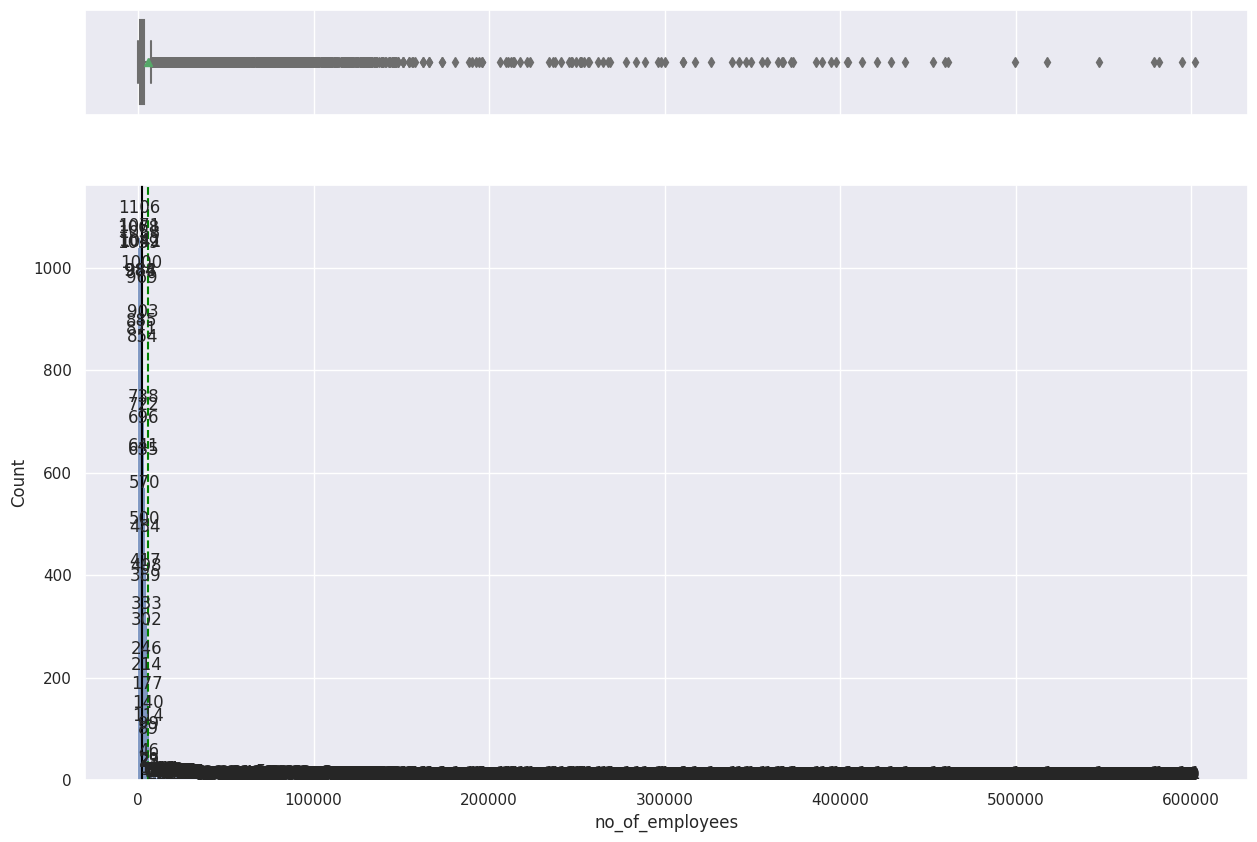

In [ ]:
histobox_plot(data, "no_of_employees")

**Observation**
* The average number of employees in employers company (mean=5667) is higher than the median (median=2109) indicating that the distribution is a right-skewed
* There are outliers

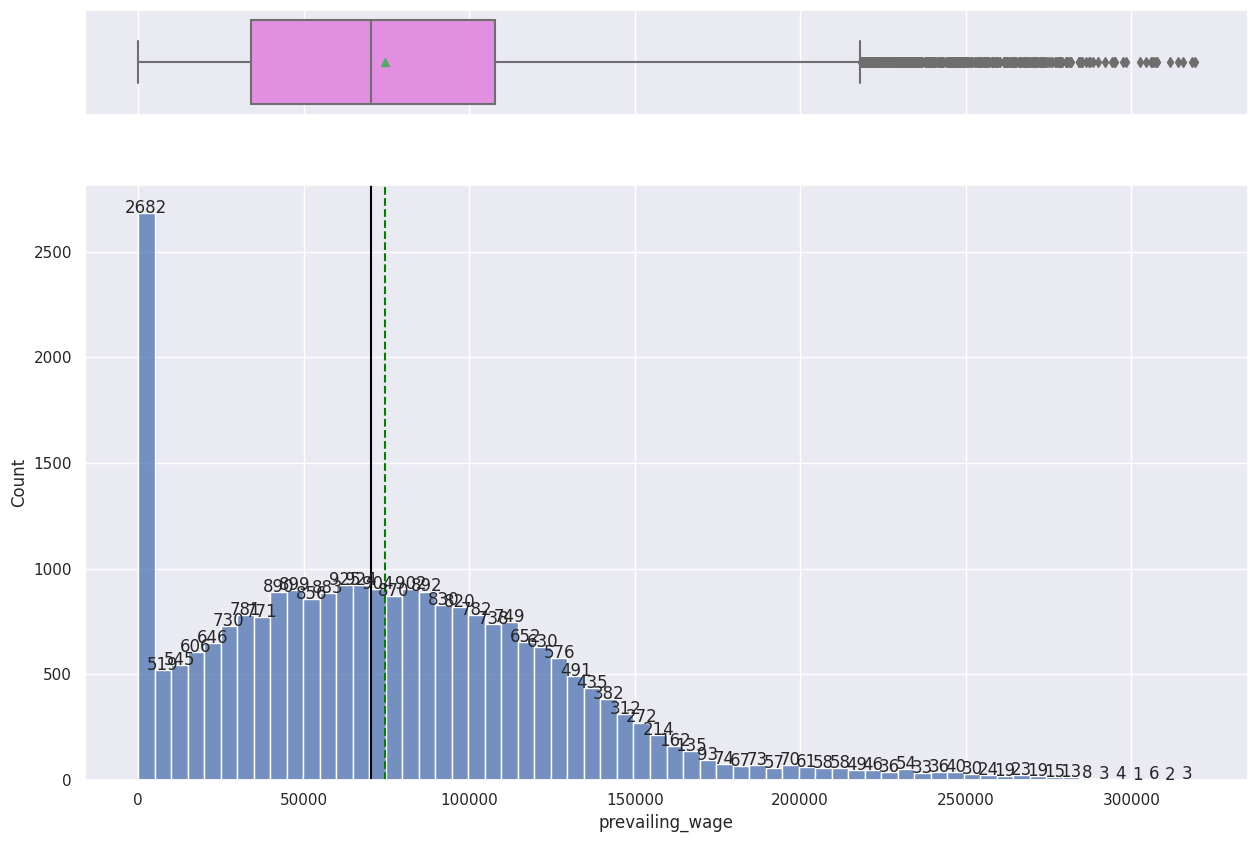

In [ ]:
histobox_plot(data, "prevailing_wage")

**Observation**
* The mean prevailing wage (mean=74455) is higher than the median( median=70308)indicating that the distribution is a bit right-skewed
* There are outliers

In [ ]:
data.loc[data["prevailing_wage"] < 100]

continent education_of_employee has_job_experience  \
338             Asia            Bachelor's                  Y   
634             Asia              Master's                  N   
839             Asia           High School                  Y   
876    South America            Bachelor's                  Y   
995             Asia              Master's                  N   
...              ...                   ...                ...   
25023           Asia            Bachelor's                  N   
25258           Asia            Bachelor's                  Y   
25308  North America              Master's                  N   
25329         Africa            Bachelor's                  N   
25461           Asia              Master's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
338                       N             2114         2012   
634                       N              834         1977   
839                       N             4537         1999   
876                       N              731         2004   
995                       N              302         2000   
...                     ...              ...          ...   
25023                     Y             3200         1994   
25258                     N             3659         1997   
25308                     N            82953         1977   
25329                     N             2172         1993   
25461                     N             2861         2004   

      region_of_employment  prevailing_wage unit_of_wage full_time_position  \
338              Northeast          15.7716         Hour                  Y   
634              Northeast           3.3188         Hour                  Y   
839                   West          61.1329         Hour                  Y   
876              Northeast          82.0029         Hour                  Y   
995                  South          47.4872         Hour                  Y   
...                    ...              ...          ...                ...   
25023                South          94.1546         Hour                  Y   
25258                South          79.1099         Hour                  Y   
25308            Northeast          42.7705         Hour                  Y   
25329            Northeast          32.9286         Hour                  Y   
25461                 West          54.9196         Hour                  Y   

      case_status  
338     Certified  
634        Denied  
839        Denied  
876        Denied  
995     Certified  
...           ...  
25023      Denied  
25258      Denied  
25308      Denied  
25329      Denied  
25461      Denied  

[176 rows x 11 columns]

In [ ]:
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts

<bound method IndexOpsMixin.value_counts of 338      Hour
634      Hour
839      Hour
876      Hour
995      Hour
         ... 
25023    Hour
25258    Hour
25308    Hour
25329    Hour
25461    Hour
Name: unit_of_wage, Length: 176, dtype: object>

**Observation**
* About 338 of the employees has prevailing wage less than $100 per hour

In [ ]:
# function to create barplots for automation
def barplot(data, column,perc=True):
  plt.figure(figsize=(10,5))
  bxp=sns.countplot(data=data,x=column)
  bxp.set_xlabel(column, fontsize=14)
  bxp.axes.set_title("Bar Chart Plot of "+ column.upper(), fontsize=16)
  plt.xticks(rotation=90)
  # label each bar in the countplot
  for p in bxp.patches:
    total = len(data[column])  # length of the column
    height = p.get_height()
    # get the height of each bar

    # percentage of each class of the category # get the height of each bar
    # adding text to each bar
    bxp.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
    s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
    ha = 'center') # sets horizontal alignment (ha) to center
  for p in bxp.patches:
    total = len(data[column])  # length of the column
    height2 = 100 * p.get_height() / total
    # get the height of each bar

    # percentage of each class of the category # get the height of each bar
    # adding text to each bar
    bxp.text(x = p.get_x()+(p.get_width()), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height2+0.4, # y-coordinate position of data label, padded 0.2 above bar
    s = '{:.0f}'.format(height2)+"%", # data label, formatted to ignore decimals
    ha = 'left') # sets horizontal alignment (ha) to center

  plt.show()

#### Observations on continent

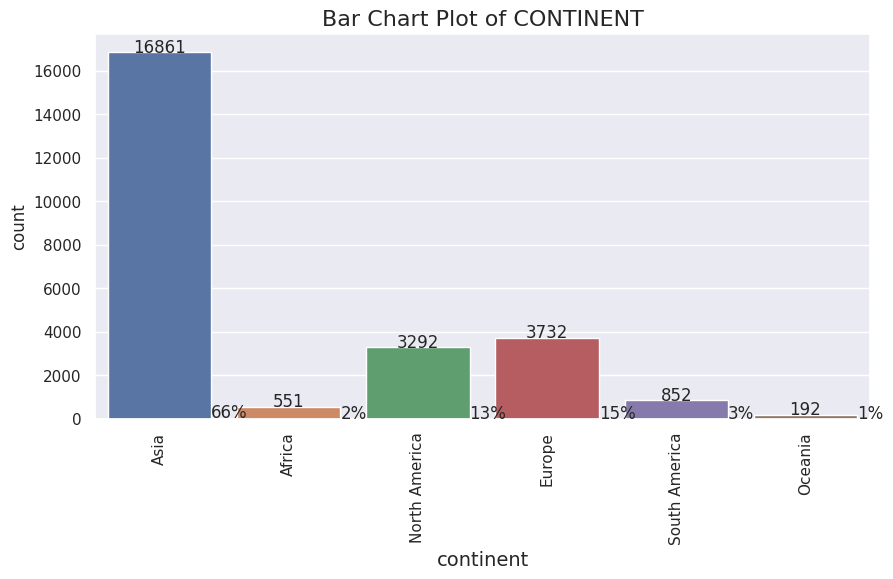

In [ ]:
barplot(data, "continent", perc=True)

#### Observations:

* The distribution of continent the employees are from  shows that it is not equally distributed.

* The most the employees are from Asia which makes up 66% of the total number employees, while Oceania has the least number of employees which is 1% of the total employed.

#### Observations on education of employee

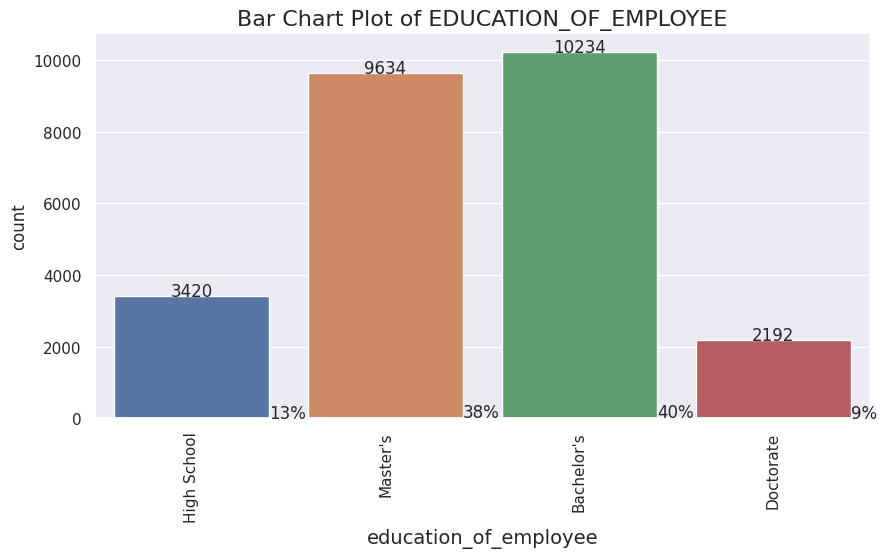

In [ ]:
barplot(data, "education_of_employee", perc=True)

#### Observations:

* The distribution on the education of employee shows that it is not equally distributed.

* The most of the employees (10324) has bachelors degree as their highest level of education which makes up 40% of the employees with Masters degree(9634) following which is 38%. Doctorate degree (2192) has the least which is 9% of the total employed.

#### Observations on job experience

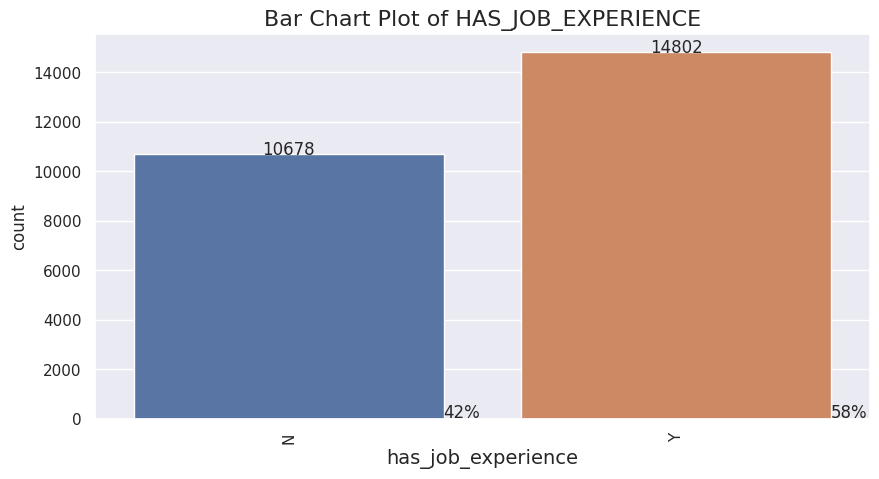

In [ ]:
barplot(data, "has_job_experience", perc=True)

#### Observations:

* The distribution on job experience shows that it is not equally distributed.

* The most of the employees (10324) has bachelors degree as their highest level of education which makes up 40% of the employees with Masters degree(9634) following which is 38%. Doctorate degree (2192) has the least which is 9% of the total employed.

#### Observations on job training

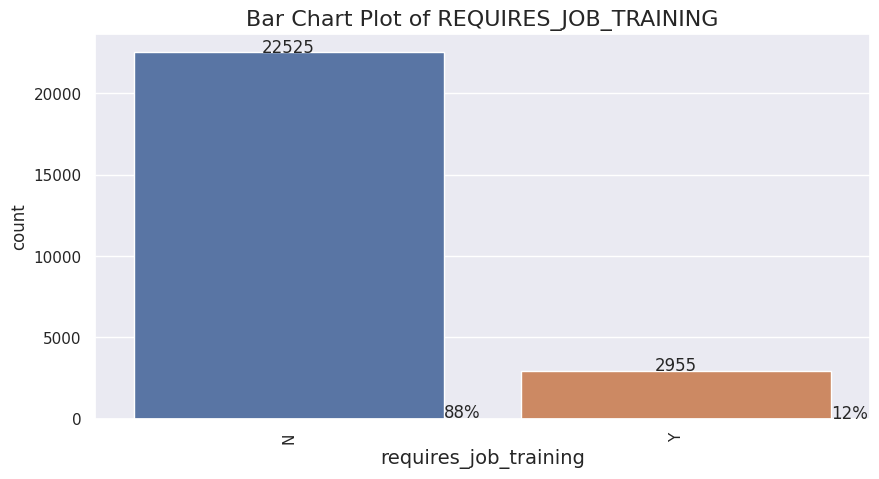

In [ ]:
barplot(data, "requires_job_training", perc=True)

#### Observations:

* The distribution on employees that requires job training shows that it is not equally distributed.

* The most of the employees that requires job training (22525) has no need for job training which is 88% of the total employeed while 2,955 which makes up 12% of the total employed.

#### Observations on region of employment

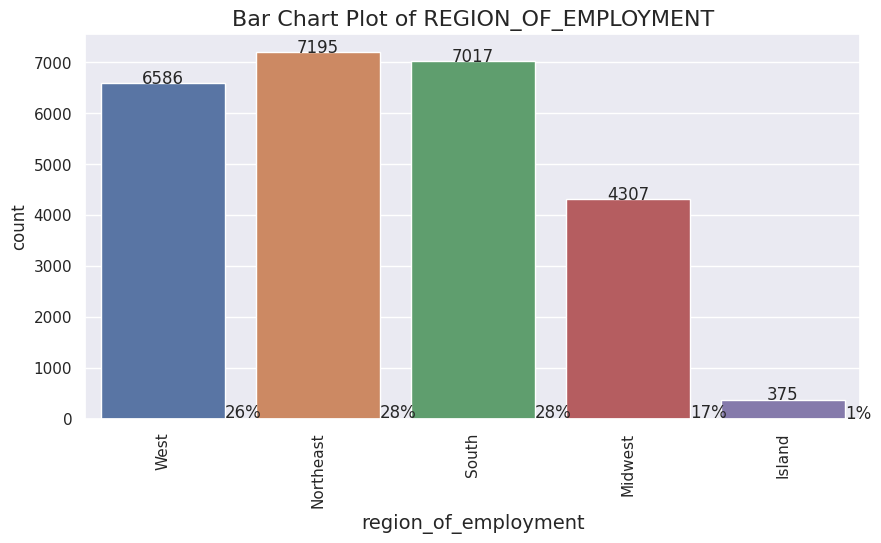

In [ ]:
barplot(data, "region_of_employment", perc=True)

#### Observations:

* The distribution on region of employment shows that it is not equally distributed.

* The most of the employees are from the Northeast region 7195(28%)

#### Observations on unit of wage

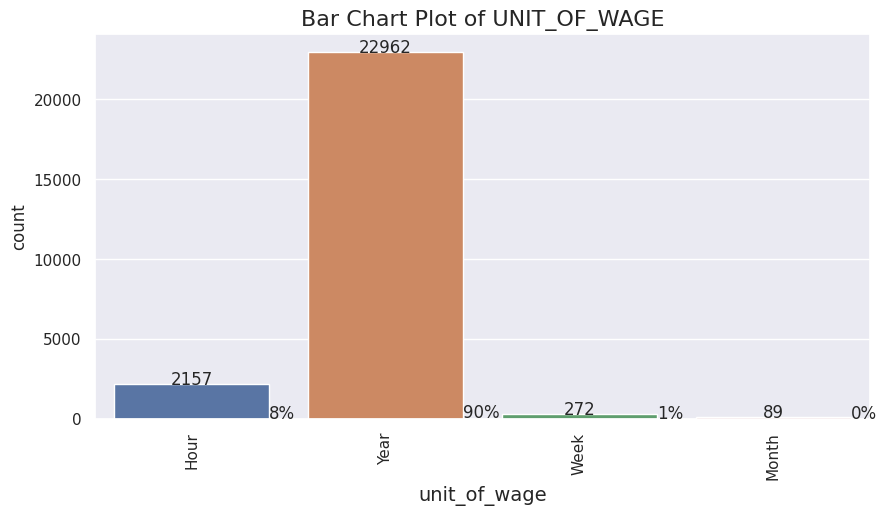

In [ ]:
barplot(data, "unit_of_wage", perc=True)

#### Observations on case status

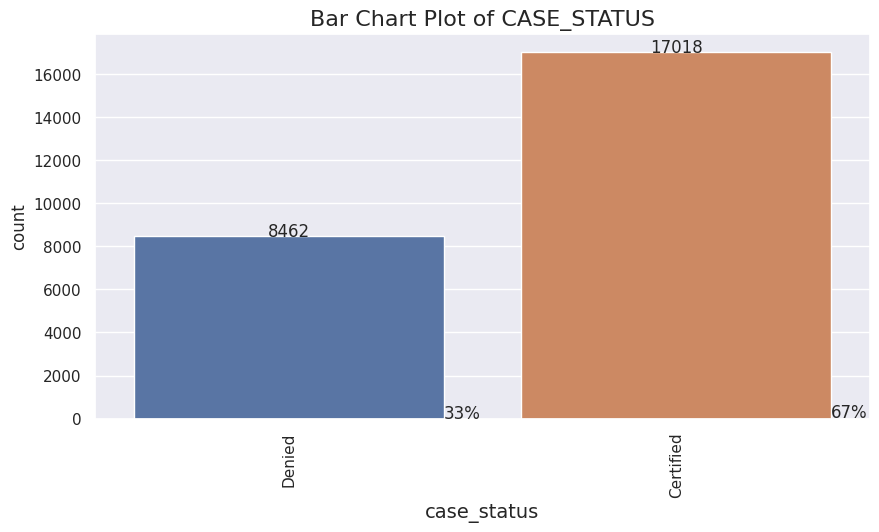

In [ ]:
barplot(data, "case_status", perc=True)

#### Observations:

* The distribution on case status shows that it is not equally distributed.

* The most of the employees 17018 that were granted Visa which is 67% of the employed

### Bivariate Analysis

In [ ]:
#Using heatmap to check correlation between columns
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations:
-No correlation was found to exist between series

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


#### Observations:

* Most of the employees with a high school certificate were denied visa which is about 66% of them followed by those with Bachelors Degree certificate which is 37.8%.
* However, most of the employees with a Doctorate degree certicate were given visa which is about 87.2% of those with Doctorate certificate followed by those with Masters degree certificate which is 78.6%.
*This shows that there seem to be high preference for those with higher level of education

#### Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data["education_of_employee"],data["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis"
)

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

#### Observations:

* Most of the foriegn workers intend to work in the Northeastern and Southeastern part of US, which gives the notion that there is more hunt for talent in this regions than other regions.
* However midwest and west regions seems to also have high prefernce by foreign workers but not as Northeast and South regions of US.
*Island had the least preference

#### Let's have a look at the percentage of visa certifications across each region

In [ ]:
stacked_barplot(data, "region_of_employment", "case_status")

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


#### Observations:

* Midwest region region of US has the highest percentage Visa certifications  75.5% which is 3253 out of the 4307 of the Visa applicants in that region.
*The South region quickly followed it, with  70.0% which is 4913 out of the 7017 of the Visa applicants in that region.
* The Island region had the least Visa Certifications 60.3% which is 226 out of the 375 of the Visa applicants in that region

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


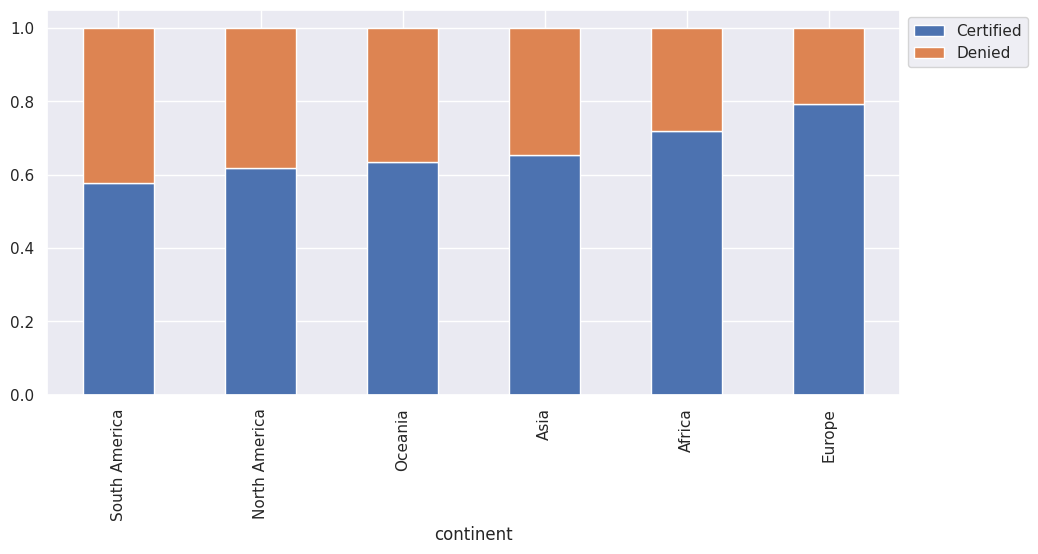

In [ ]:
stacked_barplot(data, "continent", "case_status")

#### Observations:

* European Continent has the highest percentage (79.2%) of Visa Certifications followed by the African Continent(72.1%). However, the Asian Continent has the highest number of Visa applicants and the highest number Visa certifications in general.

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

In [ ]:
stacked_barplot(data, "has_job_experience", "case_status")

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


#### Observations:

* Experienced professionals were found to have the highest percentage (74.5%) of Visa certifications and least percentage (25.5%) of Visa denial.
* Non-experienced professionals were found to have the least percentage (56.1%) of Visa certifications and highest percentage (43.9%) of Visa denial.
* Therefore experience seems to have an influence over Visa certification.

#### Do the employees who have prior work experience require any job training?

In [ ]:
stacked_barplot(data, "has_job_experience", "requires_job_training")

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


#### Observations:

* Majority (91.5%) of those who has job experience do not require job training. * There are higher percentage (15.8%) of those who do not have job experience that require training than those who has job experience that requires training (8.5%)

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

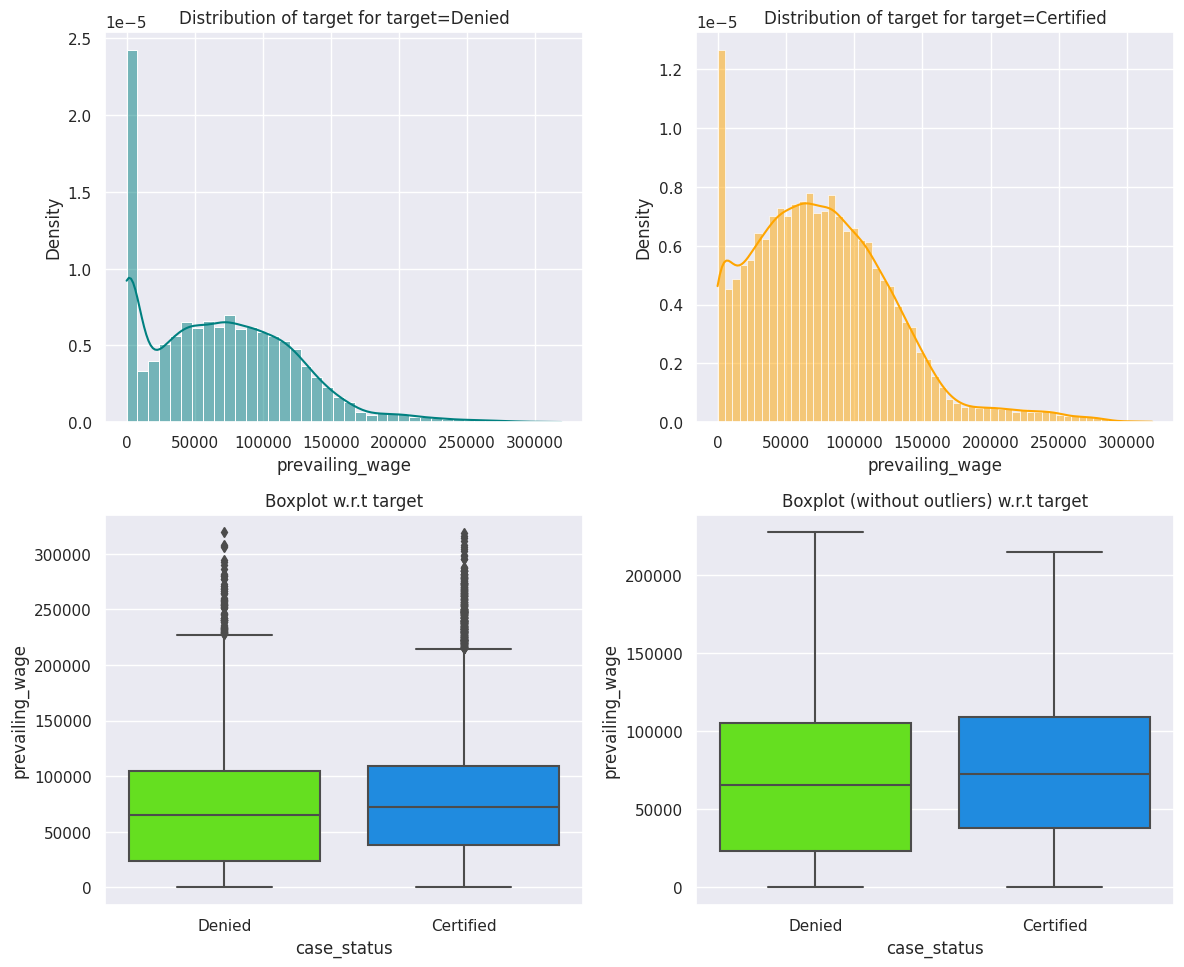

In [ ]:
distribution_plot_wrt_target(data,"prevailing_wage","case_status")

#### Checking if the prevailing wage is similar across all the regions of the US

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage", palette="gist_rainbow")
plt.show()

#### Observations:

* Midwest and Island region has a higher and similar prevailing wage than the other regions which is around 80,000 dollars of which 75% of the prevailing wages in these regions is above 120,000 dollars.

*   West and Northeast region has similar and the least prevailing wage which is around 65,000 dollars of which 75% of the prevailing wages in these regions is below 100,000 dollars

*   However there are outliers in all the regions of employment.




#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

In [ ]:
stacked_barplot(data, "unit_of_wage", "case_status")

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


#### Observations:

* The yearly prevailing wage has the highest percentage (69.9%) of Visa certifications than other unit of wage.
* The hourly prevailing wage has the least perccentage (34.6%) of Visa certifications than other unit of wage.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Outlier Check

- Let's check for outliers in the data.

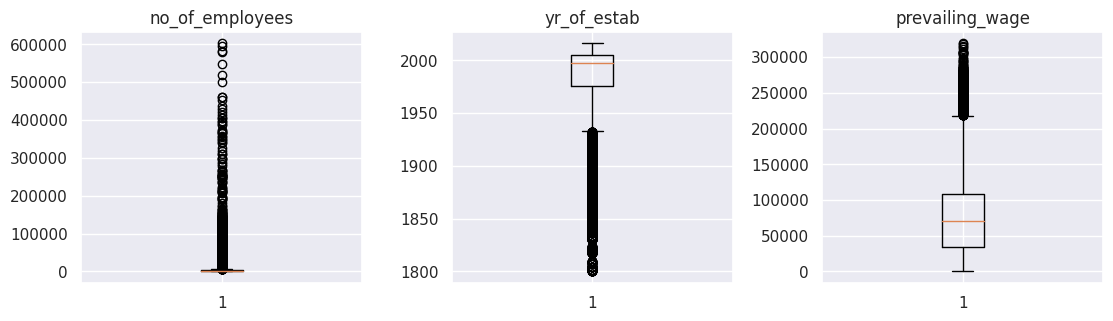

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
   plt.subplot(4, 4, i + 1)
   plt.boxplot(data[variable], whis=1.5)
   plt.tight_layout()
   plt.title(variable)

plt.show()

- There are  outliers in the data.
- However, we will not treat them as they are proper values.

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)
X = data.drop(["case_status"], axis=1)
Y = data["case_status"]
# Creating dummy variables for categorical features
X = pd.get_dummies(X, drop_first=True)
# Splitting data in train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

### Which case is more important?
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree Model

In [ ]:
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

#### Checking model performance on training set

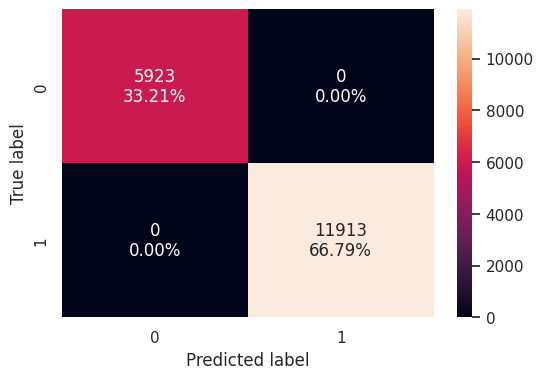

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
dtree_model_train_perf=model_performance_classification_sklearn(model, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


Observations

The decision tree is  fully grown i.e hence the model is overfit and it is able to classify almost all the data points on the training set with no errors

#### Checking model performance on test set

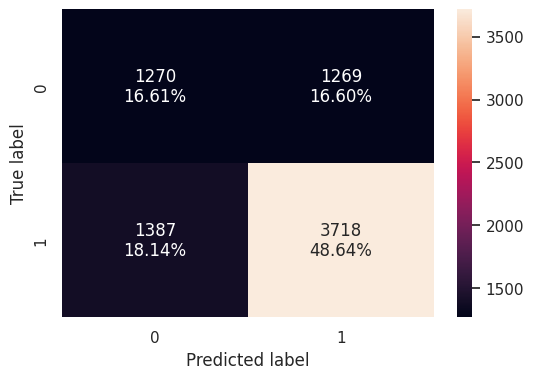

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
dtree_model_test_perf=model_performance_classification_sklearn(model, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.652538  0.728306   0.745538  0.736821


- The Decision tree model with default parameters is overfitting the train data.
- Decision tree is working well on the training data but is not able to generalize well on the test data concerning the recall.
- Let's see if we can reduce overfitting and improve performance on test data by tuning hyperparameters.

Hyperparameter Tuning - Decision Tree

In [ ]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

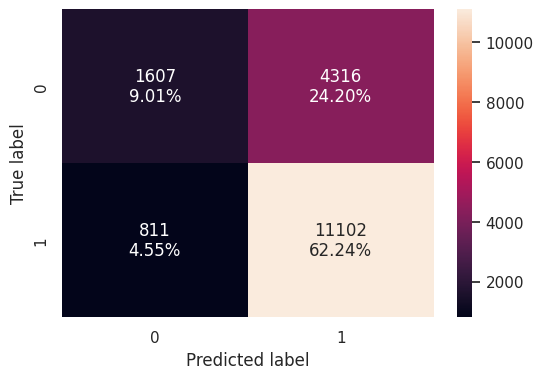

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [ ]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
dtree_estimator_model_train_perf

Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411

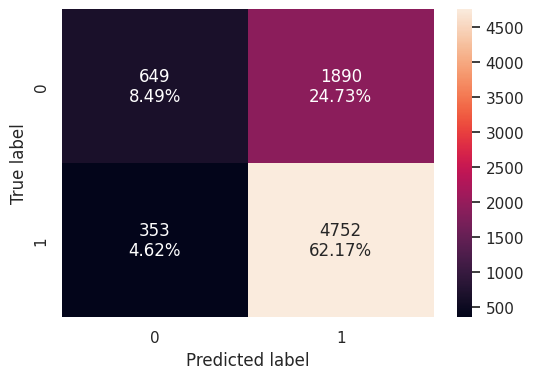

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [ ]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
dtree_estimator_model_test_perf

Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058

* The tuned Decision tree is working well on the training data and also on the  test data concerning the recall.

## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [ ]:
bagging_classifier =  BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1)

#### Checking model performance on training set

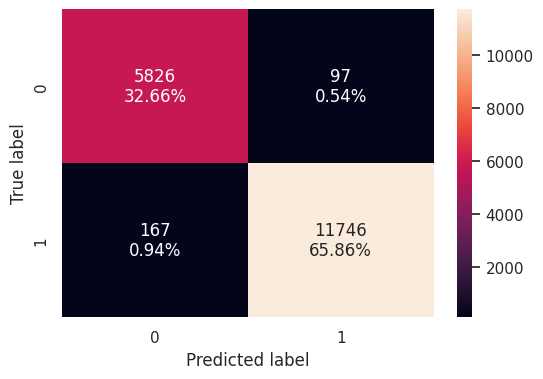

In [ ]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [ ]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train, y_train)
print("Training performance \n",bagging_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887


#### Checking model performance on test set

In [ ]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [ ]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, y_test)
print("Test performance \n",bagging_classifier_model_test_perf)

Test performance 
    Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913


* Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of recall.

### Hyperparameter Tuning - Bagging Classifier

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

#### Checking model performance on training set

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [ ]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train)
print("Train performance \n",bagging_estimator_tuned_model_train_perf)

Train performance 
    Accuracy    Recall  Precision        F1
0  0.996187  0.999916   0.994407  0.997154


#### Checking model performance on test set

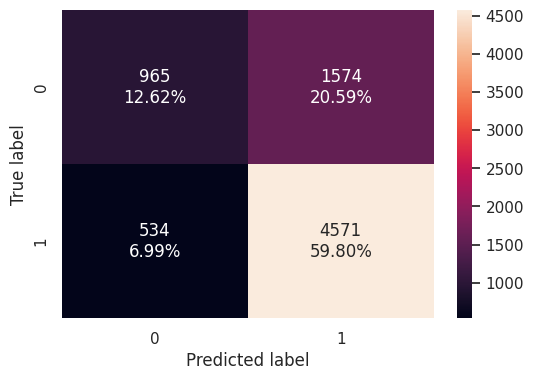

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [ ]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test)
bagging_estimator_tuned_model_test_perf

Accuracy    Recall  Precision        F1
0  0.724228  0.895397   0.743857  0.812622

* Tuned Bagging classifier is overfitting on train data but is not able to generalize well on test data in terms of accuracy, recall, precison and F1 score.

### Random Forest

In [ ]:
# Fitting the model
rf_estimator =RandomForestClassifier(random_state=1, class_weight="balanced")
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

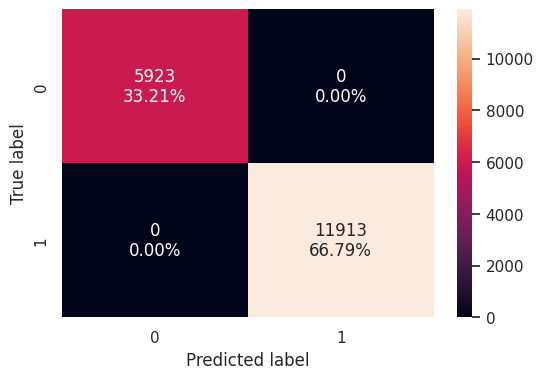

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [ ]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train)
rf_estimator_model_train_perf

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

#### Checking model performance on test set

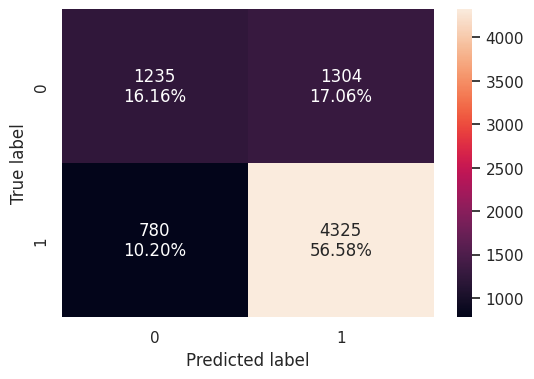

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [ ]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test)
rf_estimator_model_test_perf

Accuracy    Recall  Precision        F1
0  0.727368  0.847209   0.768343  0.805851

- The Random forest model with default parameters is overfitting the train data.
- Random forest is working well on the training data but is not able to generalize well on the test data in terms of accuracy, recall, precision and FI score
- Let's see if we can reduce overfitting and improve performance on test data by tuning hyperparameters.

### Hyperparameter Tuning - Random Forest

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs = -1 )
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=20,
                       oob_score=True, random_state=1)

#### Checking model performance on training set

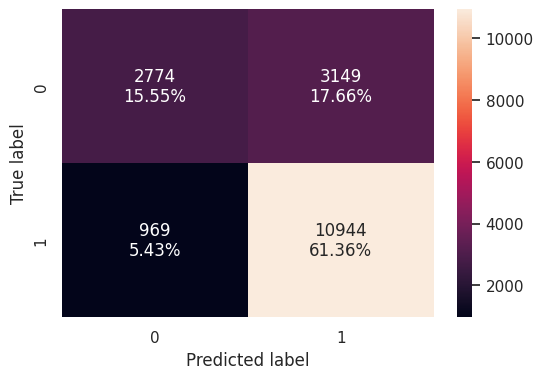

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [ ]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_tuned_model_train_perf

Accuracy   Recall  Precision        F1
0  0.769119  0.91866   0.776556  0.841652

#### Checking model performance on test set

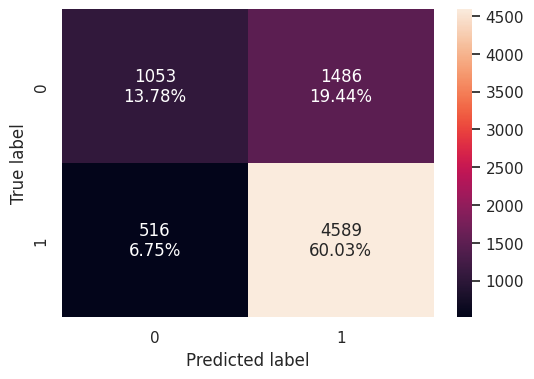

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [ ]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
rf_tuned_model_test_perf

Accuracy    Recall  Precision       F1
0  0.738095  0.898923   0.755391  0.82093

Tuned random forest model seems to perform better than the default model, on both the train data and test data in terms of recall

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [ ]:
ab_classifier =AdaBoostClassifier(random_state=1)

In [ ]:
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

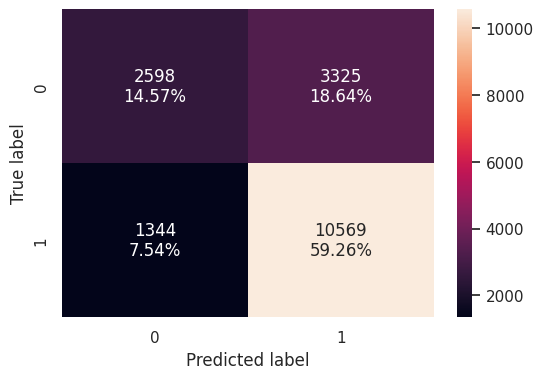

In [ ]:
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [ ]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train)
ab_classifier_model_train_perf

Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908

#### Checking model performance on test set

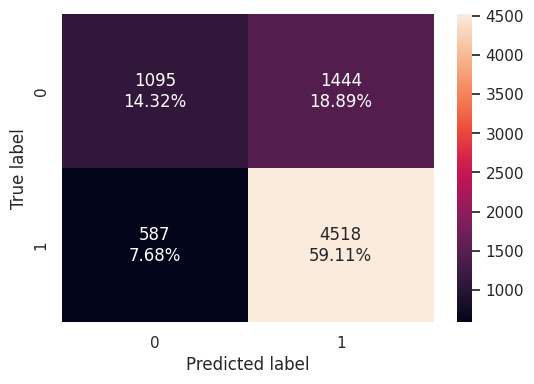

In [ ]:
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [ ]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_test, y_test)
ab_classifier_model_test_perf

Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481

Default Adaboost model seems to perform well on both the train data and test data in terms of recall.
lets see if we can improve the performance by hyperparameter tuning.

### Hyperparameter Tuning - AdaBoost Classifier

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

#### Checking model performance on training set

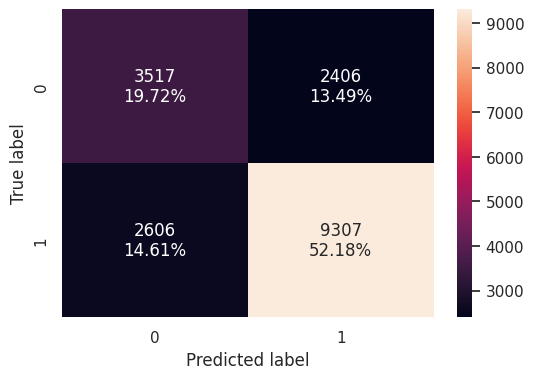

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [ ]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train, y_train)
abc_tuned_model_train_perf

Accuracy    Recall  Precision        F1
0  0.718995  0.781247   0.794587  0.787861

#### Checking model performance on test set

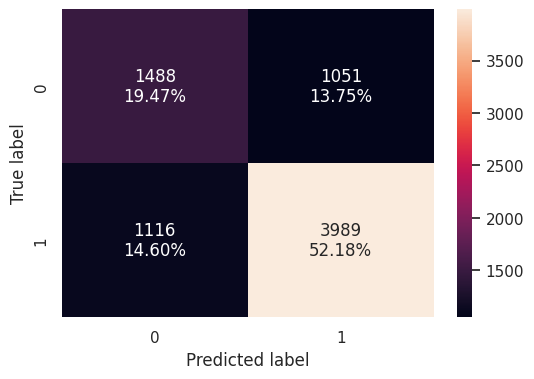

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [ ]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_test, y_test)
abc_tuned_model_test_perf

Accuracy    Recall  Precision        F1
0   0.71651  0.781391   0.791468  0.786397

The default Adaboost model seems to perform better than the tuned Adaboost model in terms of recall, as the perfromance reduced in the tuned model.

### Gradient Boosting Classifier

In [ ]:
gb_classifier =GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set

In [ ]:
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [ ]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier, X_train, y_train)
gb_classifier_model_train_perf

Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349

#### Checking model performance on test set

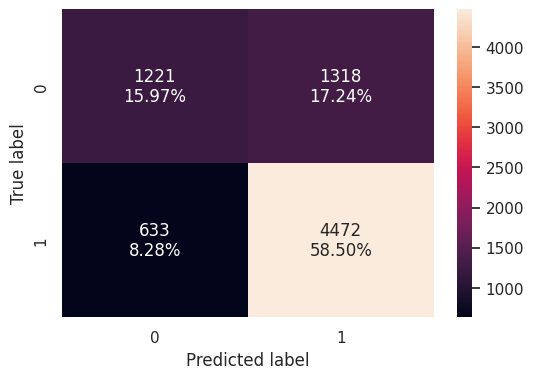

In [ ]:
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [ ]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier, X_test, y_test)
gb_classifier_model_test_perf

Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927

The default Gradient boost model seems to perform well on both the train and test data. However, lets see if we can improve the performance by tuning the hyperparameter.

### Hyperparameter Tuning - Gradient Boosting Classifier

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

#### Checking model performance on training set

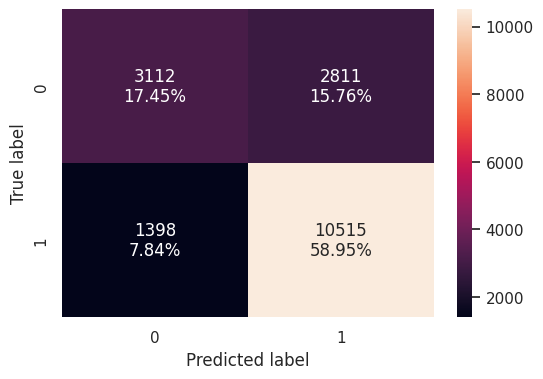

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [ ]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
gbc_tuned_model_train_perf

Accuracy    Recall  Precision        F1
0  0.764017  0.882649   0.789059  0.833234

#### Checking model performance on test set

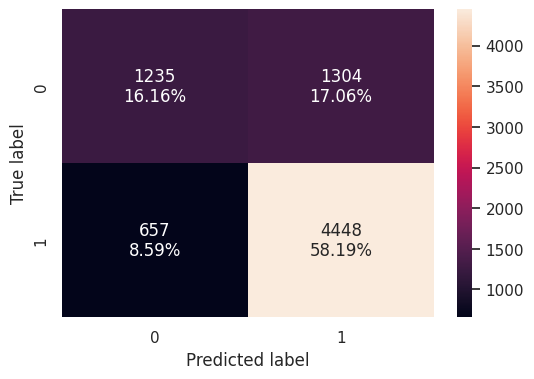

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [ ]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
gbc_tuned_model_test_perf

Accuracy    Recall  Precision        F1
0  0.743459  0.871303   0.773296  0.819379

There is no significant improvement in the performance of the tuned GBoost model compared to the default Gboost in terms of recall.

### XGBoost Classifier

In [ ]:
xgb_classifier =XGBClassifier(random_state=1,eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

#### Checking model performance on training set

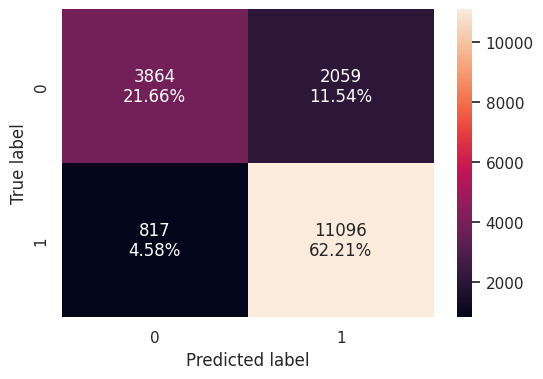

In [ ]:
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

In [ ]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, y_train)
xgb_classifier_model_train_perf

Accuracy    Recall  Precision        F1
0  0.838753  0.931419   0.843482  0.885272

#### Checking model performance on test set

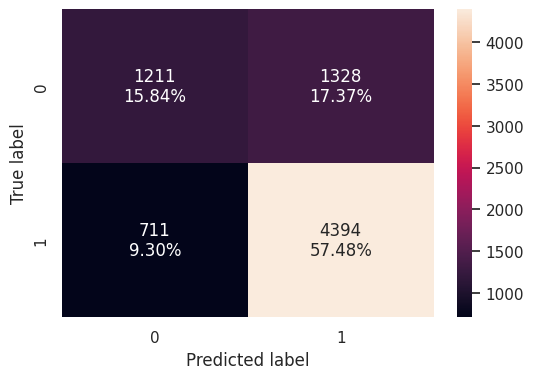

In [ ]:
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [ ]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test, y_test)
xgb_classifier_model_test_perf

Accuracy    Recall  Precision        F1
0  0.733255  0.860725   0.767913  0.811675



*   The XGBoost seems to perform well on the train data but could not generalize the model on the test data in terms of recall.
*   Lets see if the the performance can be improved on the test data by hyperparameter tuning.




### Hyperparameter Tuning - XGBoost Classifier

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

#### Checking model performance on training set

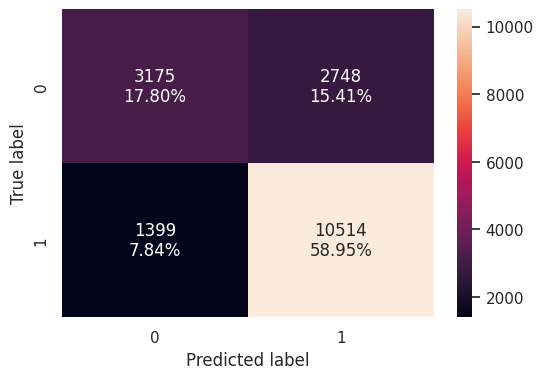

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [ ]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
xgb_tuned_model_train_perf

Accuracy    Recall  Precision        F1
0  0.767493  0.882565   0.792791  0.835273

#### Checking model performance on test set

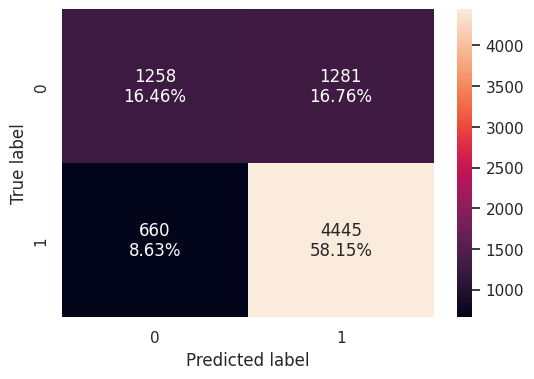

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [ ]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
xgb_tuned_model_test_perf

Accuracy    Recall  Precision        F1
0  0.746075  0.870715   0.776284  0.820792



*   The tuned XGBoost model seems to perform well on the train data and was able to generalize on the test data.
*   There seem to be an improvement in the perfomance of the test data than in the default XGBoost model in terms of recall though not much.



## Stacking Classifier

In [ ]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                       random_state=...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=150, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

### Checking model performance on training set

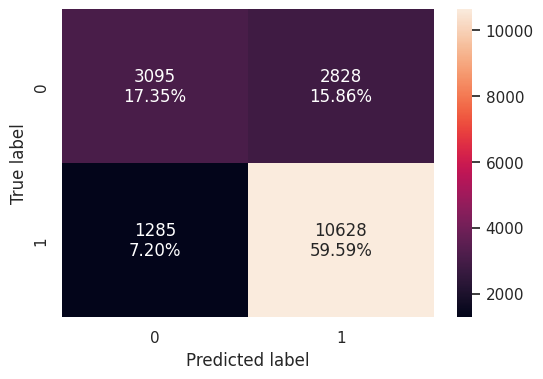

In [ ]:
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

In [ ]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train, y_train)
stacking_classifier_model_train_perf

Accuracy    Recall  Precision        F1
0  0.769399  0.892135   0.789834  0.837873

### Checking model performance on test set

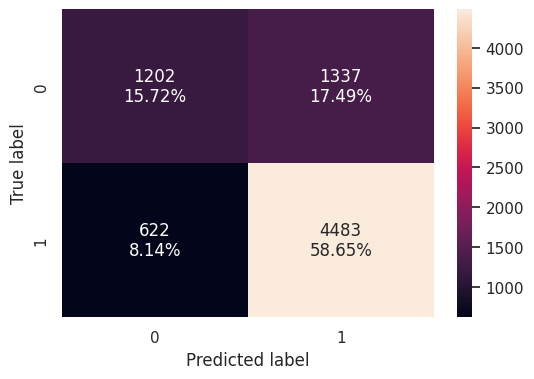

In [ ]:
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [ ]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier, X_test, y_test)
stacking_classifier_model_test_perf

Accuracy    Recall  Precision        F1
0  0.743721  0.878159   0.770275  0.820686

*   The stacked model seems to also perform well on the train data and was able to generalize on the test data in terms of recall.

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree  Tuned Decision Tree  Bagging Classifier  \
Accuracy             1.0             0.712548            0.985198   
Recall               1.0             0.931923            0.985982   
Precision            1.0             0.720067            0.991810   
F1                   1.0             0.812411            0.988887   

           Tuned Bagging Classifier  Random Forest  Tuned Random Forest  \
Accuracy                   0.996187            1.0             0.769119   
Recall                     0.999916            1.0             0.918660   
Precision                  0.994407            1.0             0.776556   
F1                         0.997154            1.0             0.841652   

           Adaboost Classifier  Tuned Adaboost Classifier  \
Accuracy              0.738226                   0.718995   
Recall                0.887182                   0.781247   
Precision             0.760688                   0.794587   
F1                    0.819080                   0.787861   

           Gradient Boost Classifier  Tuned Gradient Boost Classifier  \
Accuracy                    0.758802                         0.764017   
Recall                      0.883740                         0.882649   
Precision                   0.783042                         0.789059   
F1                          0.830349                         0.833234   

           XGBoost Classifier  XGBoost Classifier Tuned  Stacking Classifier  
Accuracy             0.838753                  0.767493             0.769399  
Recall               0.931419                  0.882565             0.892135  
Precision            0.843482                  0.792791             0.789834  
F1                   0.885272                  0.835273             0.837873

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Decision Tree  Tuned Decision Tree  Bagging Classifier  \
Accuracy        0.652538             0.706567            0.691523   
Recall          0.728306             0.930852            0.764153   
Precision       0.745538             0.715447            0.771711   
F1              0.736821             0.809058            0.767913   

           Tuned Bagging Classifier  Random Forest  Tuned Random Forest  \
Accuracy                   0.724228       0.727368             0.738095   
Recall                     0.895397       0.847209             0.898923   
Precision                  0.743857       0.768343             0.755391   
F1                         0.812622       0.805851             0.820930   

           Adaboost Classifier  Tuned Adaboost Classifier  \
Accuracy              0.734301                   0.716510   
Recall                0.885015                   0.781391   
Precision             0.757799                   0.791468   
F1                    0.816481                   0.786397   

           Gradient Boost Classifier  Tuned Gradient Boost Classifier  \
Accuracy                    0.744767                         0.743459   
Recall                      0.876004                         0.871303   
Precision                   0.772366                         0.773296   
F1                          0.820927                         0.819379   

           XGBoost Classifier  XGBoost Classifier Tuned  Stacking Classifier  
Accuracy             0.733255                  0.746075             0.743721  
Recall               0.860725                  0.870715             0.878159  
Precision            0.767913                  0.776284             0.770275  
F1                   0.811675                  0.820792             0.820686

####observation


*   Decision Tree overfitted the training data before tunning and performed poorly on the test data.
*   Tunned Decision tree performed well on both the training and test data
*   Bagging claassifier overfitted the training data before and after tunning on the training data but performed poorly on the test data.
*   Random forest overfitted the training data before tuning
*   Tuned random forest performed well  on training and test data
*   Adaboost model performed well before and after tunning on both training and test data.
*   Gradient boost   and XGBoost model performed well before and after tuning on both training and test data
*   Stacking model also performed well on both training and test data.
*   Tuned decision tree gave the highest recall on test data 0.930852








### Important features of the final model

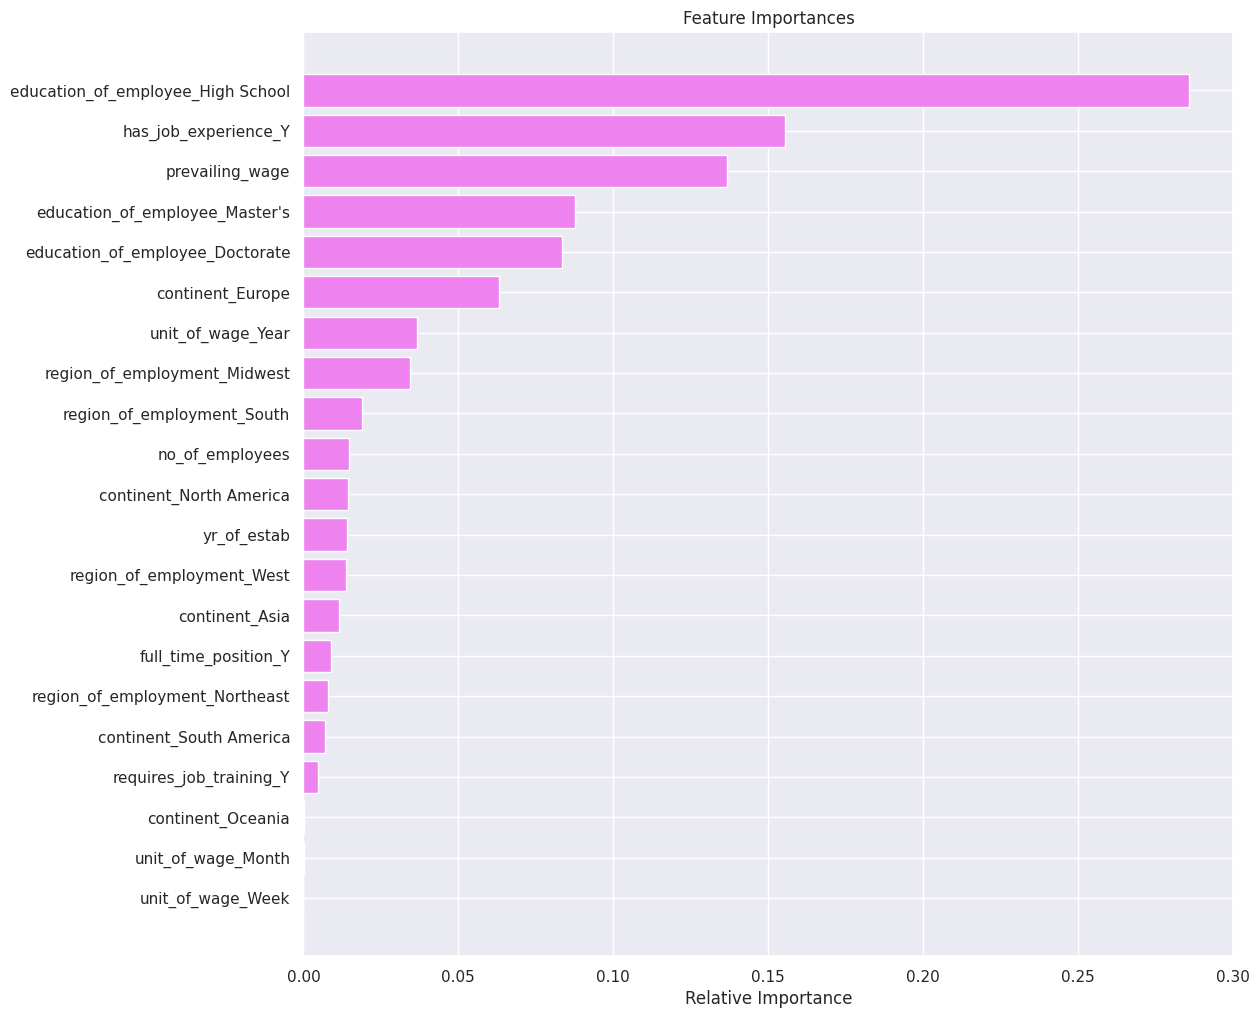

In [ ]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Employee with high school certification (education_of employee_high_school) is the most important feature for prediction followed by having job experience (has_job_experience), prevailing wage and Employee with masters certification (education_of employee_masters)

## Actionable Insights and Recommendations

* We have been able to build a predictive model:
  a) that Office of Foreign Labor Certification (OFLC) can deploy this model to Facilitate the process of visa approvals.
  b) This will help OFLC have an idea of a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.
  c) based on which OFLC can take appropriate actions to build better Visa approval policies.

* Factors that leads to Visa certification  - high school certification (education_of employee_high_school), having job experience (has_job_experience), prevailing wage and Employee with masters certification (education_of employee_masters)

* high school certification : You need to at least attend high school certification in order to get a Visa. This is because employers in US needs employees that has some level of talent and education

* Prevailing wage: Having less prevailing wage help the employer same more money and gain more.

* Employee with masters certification: Those with masters certification seems to add more values to the workforce of the employers company and help increase profit becaue of more exposure in their field of study.

